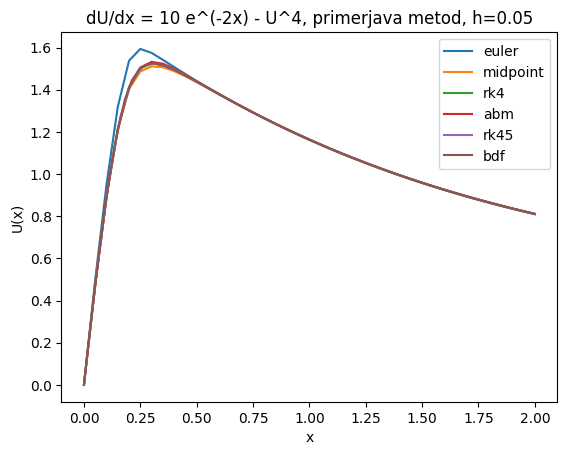

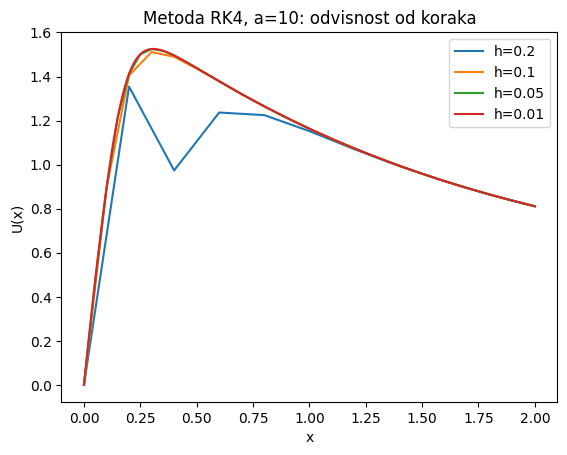

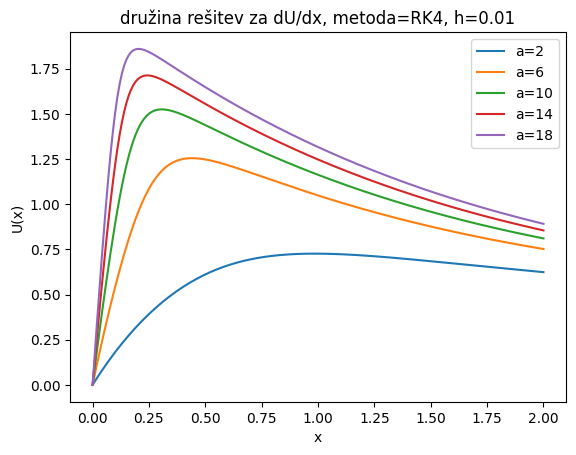

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f_ode1(x, u, a):
    return a*np.exp(-2*x) - u**4

def euler_method(f, x0, y0, h, n_steps, *args):
    xs = np.zeros(n_steps+1)
    ys = np.zeros(n_steps+1)
    xs[0], ys[0] = x0, y0
    for n in range(n_steps):
        xs[n+1] = xs[n] + h
        ys[n+1] = ys[n] + h*f(xs[n], ys[n], *args)
    return xs, ys

def midpoint_method(f, x0, y0, h, n_steps, *args):
    xs = np.zeros(n_steps+1)
    ys = np.zeros(n_steps+1)
    xs[0], ys[0] = x0, y0
    for n in range(n_steps):
        x_n, y_n = xs[n], ys[n]
        k1 = f(x_n, y_n, *args)
        k2 = f(x_n + 0.5*h, y_n + 0.5*h*k1, *args)
        xs[n+1] = x_n + h
        ys[n+1] = y_n + h*k2
    return xs, ys

def rk4_method(f, x0, y0, h, n_steps, *args):
    xs = np.zeros(n_steps+1)
    ys = np.zeros(n_steps+1)
    xs[0], ys[0] = x0, y0
    for n in range(n_steps):
        x_n, y_n = xs[n], ys[n]
        k1 = f(x_n, y_n, *args)
        k2 = f(x_n + 0.5*h, y_n + 0.5*h*k1, *args)
        k3 = f(x_n + 0.5*h, y_n + 0.5*h*k2, *args)
        k4 = f(x_n + h, y_n + h*k3, *args)
        xs[n+1] = x_n + h
        ys[n+1] = y_n + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return xs, ys

def abm_2step_method(f, x0, y0, h, n_steps, *args):
    xs = np.zeros(n_steps+1)
    ys = np.zeros(n_steps+1)
    xs[0], ys[0] = x0, y0
    if n_steps > 0:
        k1 = f(xs[0], ys[0], *args)
        k2 = f(xs[0] + 0.5*h, ys[0] + 0.5*h*k1, *args)
        k3 = f(xs[0] + 0.5*h, ys[0] + 0.5*h*k2, *args)
        k4 = f(xs[0] + h, ys[0] + h*k3, *args)
        y1 = ys[0] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        x1 = xs[0] + h
        xs[1], ys[1] = x1, y1
    for n in range(1, n_steps):
        x_nm1, y_nm1 = xs[n-1], ys[n-1]
        x_n, y_n = xs[n], ys[n]
        f_nm1 = f(x_nm1, y_nm1, *args)
        f_n = f(x_n, y_n, *args)
        x_np1 = x_n + h
        y_pred = y_n + (h/2)*(3*f_n - f_nm1)
        f_pred = f(x_np1, y_pred, *args)
        y_np1 = y_n + (h/12)*(5*f_pred + 8*f_n - f_nm1)
        xs[n+1], ys[n+1] = x_np1, y_np1
    return xs, ys

def solve_ode1_with_various_methods(a=10, x_max=2.0, h=0.1):
    n_steps = int((x_max - 0.0)/h)
    x_eu, y_eu = euler_method(f_ode1, 0.0, 0.0, h, n_steps, a)
    x_mid, y_mid = midpoint_method(f_ode1, 0.0, 0.0, h, n_steps, a)
    x_rk4, y_rk4 = rk4_method(f_ode1, 0.0, 0.0, h, n_steps, a)
    x_abm, y_abm = abm_2step_method(f_ode1, 0.0, 0.0, h, n_steps, a)
    sol_rk45 = solve_ivp(lambda xx, uu: f_ode1(xx, uu, a), [0, x_max], [0.0], method='RK45', max_step=h)
    sol_bdf = solve_ivp(lambda xx, uu: f_ode1(xx, uu, a), [0, x_max], [0.0], method='BDF', max_step=h)
    return {'euler': (x_eu, y_eu),
            'midpoint': (x_mid, y_mid),
            'rk4': (x_rk4, y_rk4),
            'abm': (x_abm, y_abm),
            'rk45': (sol_rk45.t, sol_rk45.y[0]),
            'bdf': (sol_bdf.t, sol_bdf.y[0])}

def demo_ode1_comparison(a=10, x_max=2.0, h=0.05):
    rez = solve_ode1_with_various_methods(a, x_max, h)
    plt.figure()
    for method, (xx, yy) in rez.items():
        plt.plot(xx, yy, label=method)
    plt.title(f"dU/dx = {a} e^(-2x) - U^4, primerjava metod, h={h}")
    plt.xlabel("x")
    plt.ylabel("U(x)")
    plt.legend()
    plt.savefig(f"primerjava_{a}.png")
    plt.show()

def demo_ode1_step_sensitivity(a=10, x_max=2.0, method='rk4', step_list=[0.2, 0.1, 0.05, 0.01]):
    plt.figure()
    for h in step_list:
        rez = solve_ode1_with_various_methods(a, x_max, h)
        xx, yy = rez[method]
        plt.plot(xx, yy, label=f"h={h}")
    plt.title(f"Metoda {method.upper()}, a={a}: odvisnost od koraka")
    plt.xlabel("x")
    plt.ylabel("U(x)")
    plt.legend()
    plt.savefig(f"koraki_{method}.png")
    plt.show()

def demo_ode1_family_of_solutions(a_values=[2,6,10,14,18], x_max=2.0, h=0.01, method='rk4'):
    plt.figure()
    for a in a_values:
        rez = solve_ode1_with_various_methods(a, x_max, h)
        xx, yy = rez[method]
        plt.plot(xx, yy, label=f"a={a}")
    plt.title(f"družina rešitev za dU/dx, metoda={method.upper()}, h={h}")
    plt.xlabel("x")
    plt.ylabel("U(x)")
    plt.legend()
    plt.savefig(f"druzina_resitev_{method}.png")
    plt.show()

if __name__ == "__main__":
    demo_ode1_comparison(a=10, x_max=2.0, h=0.05)
    demo_ode1_step_sensitivity(a=10, x_max=2.0, method='rk4', step_list=[0.2, 0.1, 0.05, 0.01])
    demo_ode1_family_of_solutions(a_values=[2,6,10,14,18], x_max=2.0, h=0.01, method='rk4')


C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_13248\868282777.py:12: RuntimeWarning: overflow encountered in scalar power
  return y**2 + 2*t**2


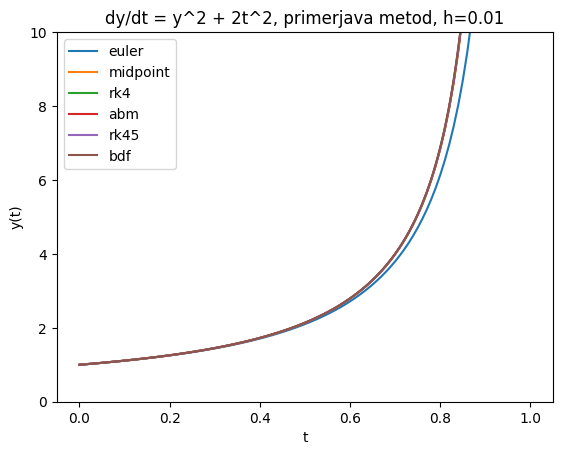

C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_13248\868282777.py:109: RuntimeWarning: invalid value encountered in scalar subtract
  y_pred = y_n + 0.5*h*(3*f_n - f_nm1)


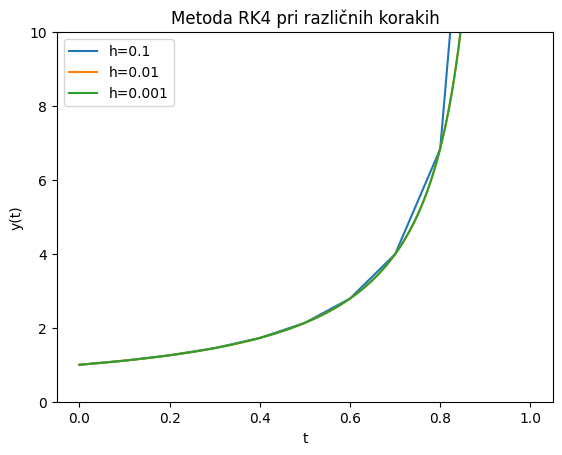

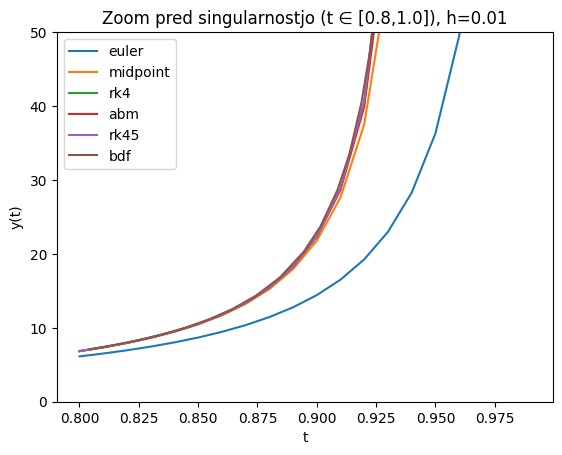

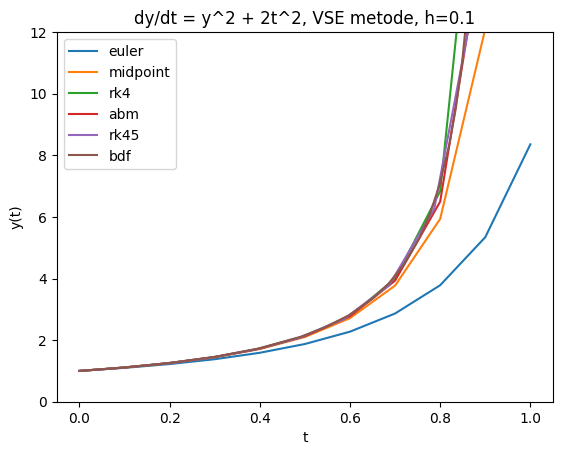

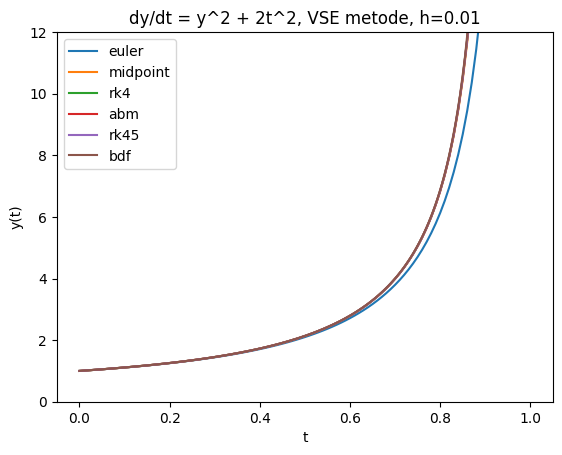

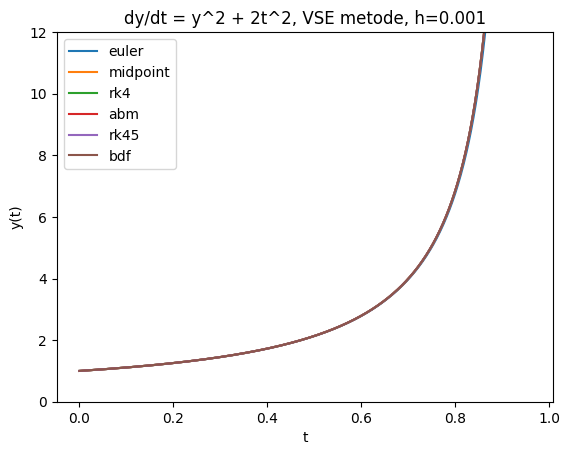

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def f_ode2(t, y):
    return y**2 + 2*t**2


def euler_method(f, t0, y0, h, n_steps, *args):

    ts = np.zeros(n_steps+1)
    ys = np.zeros(n_steps+1)
    ts[0], ys[0] = t0, y0
    
    for n in range(n_steps):
        ts[n+1] = ts[n] + h
        ys[n+1] = ys[n] + h*f(ts[n], ys[n], *args)
    return ts, ys

def midpoint_method(f, t0, y0, h, n_steps, *args):
    
    ts = np.zeros(n_steps+1)
    ys = np.zeros(n_steps+1)
    ts[0], ys[0] = t0, y0
    
    for n in range(n_steps):
        t_n, y_n = ts[n], ys[n]
        k1 = f(t_n, y_n, *args)
        k2 = f(t_n + 0.5*h, y_n + 0.5*h*k1, *args)
        ts[n+1] = t_n + h
        ys[n+1] = y_n + h*k2
    return ts, ys

def rk4_method(f, t0, y0, h, n_steps, *args):
    
    ts = np.zeros(n_steps+1)
    ys = np.zeros(n_steps+1)
    ts[0], ys[0] = t0, y0
    
    for n in range(n_steps):
        t_n, y_n = ts[n], ys[n]
        
        k1 = f(t_n,         y_n,             *args)
        k2 = f(t_n + 0.5*h, y_n + 0.5*h*k1,  *args)
        k3 = f(t_n + 0.5*h, y_n + 0.5*h*k2,  *args)
        k4 = f(t_n + h,     y_n + h*k3,      *args)
        
        ts[n+1] = t_n + h
        ys[n+1] = y_n + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return ts, ys


def abm_2step_method(f, t0, y0, h, n_steps, *args):
    
    ts = np.zeros(n_steps+1)
    ys = np.zeros(n_steps+1)
    ts[0], ys[0] = t0, y0
    
    if n_steps > 0:
        k1 = f(ts[0], ys[0], *args)
        k2 = f(ts[0]+0.5*h, ys[0] + 0.5*h*k1, *args)
        k3 = f(ts[0]+0.5*h, ys[0] + 0.5*h*k2, *args)
        k4 = f(ts[0]+h,     ys[0] + h*k3,     *args)
        
        y1 = ys[0] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t1 = ts[0] + h
        ts[1], ys[1] = t1, y1
    
    for n in range(1, n_steps):
        t_nm1, y_nm1 = ts[n-1], ys[n-1]  # (n-1)
        t_n,   y_n   = ts[n],   ys[n]
        
        f_nm1 = f(t_nm1, y_nm1, *args)
        f_n   = f(t_n,   y_n,   *args)
        
        t_np1 = t_n + h
        y_pred = y_n + 0.5*h*(3*f_n - f_nm1)
        
        f_pred = f(t_np1, y_pred, *args)
        y_np1 = y_n + (h/12)*(5*f_pred + 8*f_n - f_nm1)
        
        ts[n+1], ys[n+1] = t_np1, y_np1
    
    return ts, ys


def solve_ode2_with_various_methods(t_max=1.0, h=0.01):
    
    n_steps = int((t_max - 0.0)/h)
    
    t_eu,  y_eu   = euler_method(f_ode2, 0.0, 1.0, h, n_steps)
    
    t_mid, y_mid  = midpoint_method(f_ode2, 0.0, 1.0, h, n_steps)
    
    t_rk4, y_rk4  = rk4_method(f_ode2, 0.0, 1.0, h, n_steps)
    
    t_abm, y_abm  = abm_2step_method(f_ode2, 0.0, 1.0, h, n_steps)
    
    sol_rk45 = solve_ivp(f_ode2, [0, t_max], [1.0], method='RK45', max_step=h)
    
    sol_bdf  = solve_ivp(f_ode2, [0, t_max], [1.0], method='BDF', max_step=h)
    
    return {
        'euler':    (t_eu,   y_eu),
        'midpoint': (t_mid,  y_mid),
        'rk4':      (t_rk4,  y_rk4),
        'abm':      (t_abm,  y_abm),
        'rk45':     (sol_rk45.t, sol_rk45.y[0]),
        'bdf':      (sol_bdf.t,  sol_bdf.y[0])
    }


def demo_ode2_compare_methods(t_max=1.0, h=0.01):
    
    rez = solve_ode2_with_various_methods(t_max, h)
    plt.figure()
    for method, (tt, yy) in rez.items():
        plt.plot(tt, yy, label=method)
    plt.title(f"dy/dt = y^2 + 2t^2, primerjava metod, h={h}")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.ylim([0, 10])
    plt.legend()
    plt.savefig(f"ode2_compare_methods_h{h}.png")
    plt.show()

def demo_ode2_various_steps(t_max=1.0, method='rk4', step_list=[0.1, 0.01, 0.001]):
    
    plt.figure()
    for h in step_list:
        rez = solve_ode2_with_various_methods(t_max, h)
        ts, ys = rez[method]
        plt.plot(ts, ys, label=f"h={h}")
    plt.title(f"Metoda {method.upper()} pri različnih korakih")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.ylim([0, 10])
    plt.legend()
    plt.savefig(f"ode2_{method}_various_steps.png")
    plt.show()

def demo_ode2_zoom_near_singularity(t_max=1.0, h=0.01, zoom_interval=(0.8,1.0)):
    
    rez = solve_ode2_with_various_methods(t_max, h)
    tmin, tmax = zoom_interval
    
    plt.figure()
    for method, (tt, yy) in rez.items():
        mask = (tt>=tmin) & (tt<=tmax)
        plt.plot(tt[mask], yy[mask], label=method)
    plt.title(f"Zoom pred singularnostjo (t ∈ [{tmin},{tmax}]), h={h}")
    plt.xlabel("t")
    plt.ylabel("y(t)")
    plt.legend()
    plt.savefig(f"ode2_zoom_singularity_h{h}.1.png")
    plt.ylim([0, 50])  # da ujamemo dvig
    plt.show()

def demo_ode2_compare_all_methods_for_different_steps(t_max=1.0, step_list=[0.1, 0.01, 0.001]):
    
    for h in step_list:
        results = solve_ode2_with_various_methods(t_max, h)
        plt.figure()
        for method_name, (ts, ys) in results.items():
            plt.plot(ts, ys, label=method_name)
        
        plt.title(f"dy/dt = y^2 + 2t^2, VSE metode, h={h}")
        plt.xlabel("t")
        plt.ylabel("y(t)")
        plt.ylim([0, 12])  # da ujamemo dvig
        plt.legend()
        plt.savefig(f"ode2_methods_h{h}.png")
        plt.show()


if __name__ == "__main__":
    demo_ode2_compare_methods(t_max=1.0, h=0.01)
    
    demo_ode2_various_steps(t_max=1.0, method='rk4', step_list=[0.1, 0.01, 0.001])
    
    demo_ode2_zoom_near_singularity(t_max=1.0, h=0.01, zoom_interval=(0.8,1.0))
    
    demo_ode2_compare_all_methods_for_different_steps(
        t_max=1.0, 
        step_list=[0.1, 0.01, 0.001]
    )
